In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [35]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
X


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [39]:
class SVM:
    def __init__(self, lr = 0.01, lambda_param = 0.01, epochs = 1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        Y = np.where(y<=1,1,-1)
        for _ in range(self.epochs):
            for n,x in enumerate(X):
                if Y[n] * (np.dot(x,self.w) + self.b)<1:
                    self.w += self.lr * (Y[n]*X[n]-2* self.lambda_param * self.w)
                    self.b -= self.lr*Y[n]
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
    def predict(self,x):
        linear_output = np.dot(x,self.w) + self.b
        return np.sign(linear_output)    

In [40]:
svm = SVM()
svm.fit(X,y)
print("Shape of X:", X.shape)
print("First 5 samples of X:\n", X[:5])
print("First 5 labels of Y:", y[:5])
test_samples = X[:5]
predictions = svm.predict(test_samples)
print("\n Predictions : ",predictions)


Shape of X: (150, 2)
First 5 samples of X:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
First 5 labels of Y: [0 0 0 0 0]

 Predictions :  [-1. -1. -1. -1. -1.]


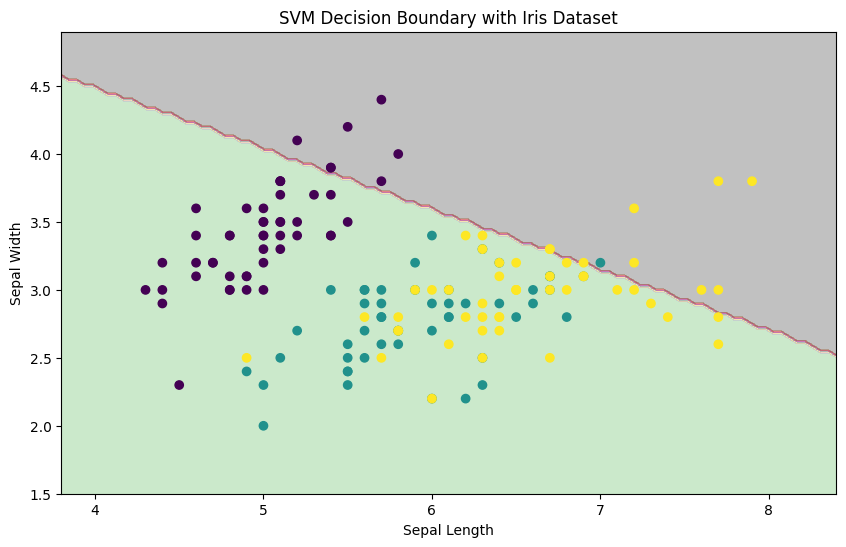

In [41]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get predictions for mesh grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Accent')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with Iris Dataset')
plt.show()